In [75]:
import numpy as np
import pandas as pd

In [76]:
dataset = pd.read_csv("broccoli.csv")
dataset.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [77]:
X = dataset.iloc[:,[3,4,5,6,7,8,9,10,11,12,13]].values
X

array([[64236.62, 1036.74, 54454.85, ..., 'conventional', 2015, 'Albany'],
       [54876.98, 674.28, 44638.81, ..., 'conventional', 2015, 'Albany'],
       [118220.22, 794.7, 109149.67, ..., 'conventional', 2015, 'Albany'],
       ...,
       [13766.76, 1191.92, 2452.79, ..., 'organic', 2018,
        'WestTexNewMexico'],
       [16205.22, 1527.63, 2981.04, ..., 'organic', 2018,
        'WestTexNewMexico'],
       [17489.58, 2894.77, 2356.13, ..., 'organic', 2018,
        'WestTexNewMexico']], dtype=object)

In [78]:
y = dataset.iloc[:,2].values
y

array([1.33, 1.35, 0.93, ..., 1.87, 1.93, 1.62])

In [79]:
from sklearn.preprocessing import Imputer 
imputer = Imputer(missing_values = np.nan, strategy = "mean", axis = 0)
imputer = imputer.fit(X[:,[0,1,2,3,4,5,6,7,9]])
X[:,[0,1,2,3,4,5,6,7,9]] = imputer.transform(X[:,[0,1,2,3,4,5,6,7,9]])
X[:,[0,1,2,3,4,5,6,7,9]]

c:\users\rade\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[64236.62, 1036.74, 54454.85, ..., 93.25, 0.0, 2015.0],
       [54876.98, 674.28, 44638.81, ..., 97.49, 0.0, 2015.0],
       [118220.22, 794.7, 109149.67, ..., 103.14, 0.0, 2015.0],
       ...,
       [13766.76, 1191.92, 2452.79, ..., 42.31, 0.0, 2018.0],
       [16205.22, 1527.63, 2981.04, ..., 50.0, 0.0, 2018.0],
       [17489.58, 2894.77, 2356.13, ..., 26.01, 0.0, 2018.0]],
      dtype=object)

In [80]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,8] = labelencoder_X.fit_transform(X[:,8])
X[:,8]

array([0, 0, 0, ..., 1, 1, 1], dtype=object)

In [81]:
X[:,10] = labelencoder_X.fit_transform(X[:,10])
X[:,10]

array([0, 0, 0, ..., 53, 53, 53], dtype=object)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [83]:
X_train.shape

(14599, 11)

In [84]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

40.94954186690332 %


In [85]:
cor = dataset.corr()
cor_target = abs(cor["AveragePrice"])
rel_features = cor_target[cor_target<0.1]
rel_features.index

Index(['year'], dtype='object')

In [86]:
#X = np.delete(X,9,1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [88]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

40.94954186690332 %


In [89]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train) 


# Make predictions and determine the error
predictions = regressor.predict(X_test)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.11 degrees.
Accuracy: 91.89 %.


In [90]:
y_test

array([1.48, 1.05, 1.27, ..., 1.76, 1.69, 1.61])

In [91]:
import matplotlib.pyplot as plt

(3650,)


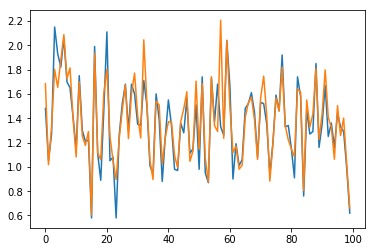

In [92]:
plt.figure()
print(y_test.shape)
plt.plot(y_test[:100])
plt.plot(predictions[:100])

In [93]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN, device=gpu, floatX=float32"

In [94]:
X.shape[1]

11

In [1]:
import time  
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(2017)

ModuleNotFoundError: No module named 'keras'

In [ ]:
# def Network():
#     model = Sequential()
#     model.add(Dense(200, input_dim = X.shape[1], activation = 'sigmoid'))
#     model.add(Dense(1, activation = 'linear'))
#     sgd = SGD(lr=0.01)
#     model.compile(optimizer=sgd, loss='mae', metrics=['mean_absolute_error'])
#     return model

In [109]:
def Network():
    NN_model = Sequential()

    # The Input Layer :
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

    # The Hidden Layers :
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

    # The Output Layer :
    NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

    # Compile the network :
    NN_model.compile(loss='mae', optimizer='adam', metrics=['mean_absolute_error'])
    NN_model.summary()
    return NN_model

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_49 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 257       
Total params: 34,817
Trainable params: 34,817
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.42 degrees.
Accuracy: 68.18 %.


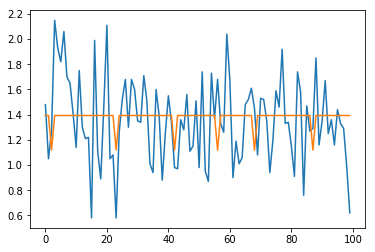

In [110]:
# define model
model = Network()
# define optimizer
model_info = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0, validation_split=0.2)

# Make predictions and determine the error
predictions = model.predict(X_test)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
plt.plot(y_test[:100])
plt.plot(predictions[:100])

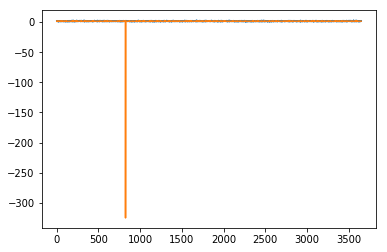

In [111]:
plt.plot(y_test)
plt.plot(predictions)

In [123]:
import tensorflow.contrib.learn as skflow
import tensorflow as tf
# Train/Test Dataset for Validation
X_train,X_test,y_train,y_test = train_test_split(X, y,
						test_size=0.1,
						random_state=2)

# Defining the Tensorflow input functions
# for training
def training_input_fn(batch_size=1):
	return tf.estimator.inputs.numpy_input_fn(
					x={'X': X_train.astype(np.float32)},
					y=y_train.astype(np.float32),
					batch_size=batch_size,
					num_epochs=None,
					shuffle=True)
# for test
def test_input_fn():
	return tf.estimator.inputs.numpy_input_fn(
				  	x={'X': X_test.astype(np.float32)},
				  	y=y_test.astype(np.float32),
				  	num_epochs=1,
				  	shuffle=False)
# Network Design
# --------------
feature_columns = [tf.feature_column.numeric_column('X', shape=(1,))]

STEPS_PER_EPOCH = 100
EPOCHS = 1000
BATCH_SIZE = 100

hidden_layers = [16, 16, 16, 16, 16]
dropout = 0.0
# Validation and Test Configuration
validation_metrics = {"MSE": tf.contrib.metrics.streaming_mean_squared_error}
test_config = skflow.RunConfig(save_checkpoints_steps=100,
				save_checkpoints_secs=None)

# Building the Network
regressor = skflow.DNNRegressor(feature_columns=feature_columns,
				label_dimension=1,
				hidden_units=hidden_layers,
				dropout=dropout,
				config=test_config)
for epoch in range(EPOCHS+1):

		# Fit the DNNRegressor (This is where the magic happens!!!)
		regressor.fit(input_fn=training_input_fn(batch_size=BATCH_SIZE),
				steps=STEPS_PER_EPOCH)
		# Thats it -----------------------------
		# Start Tensorboard in Terminal:
		# 	tensorboard --logdir='./DNNRegressors/'
		# Now open Browser and visit localhost:6006\

		
		# This is just for fun and educational purpose:
		# Evaluate the DNNRegressor every 10th epoch
		if epoch%10==0:
			eval_dict = regressor.evaluate(input_fn=test_input_fn(),
							metrics=validation_metrics)
				
			print('Epoch %i: %.5f MSE' % (epoch+1, eval_dict['MSE']))

W0131 11:22:26.476203 10124 estimator.py:453] Using temporary folder as model directory: C:\Users\Rade\AppData\Local\Temp\tmpgek8ydxf


ValueError: Cannot reshape a tensor with 1100 elements to shape [100,1] (100 elements) for 'dnn/input_from_feature_columns/input_layer/X/Reshape' (op: 'Reshape') with input shapes: [100,11], [2] and with input tensors computed as partial shapes: input[1] = [100,1].